In [4]:
# Configuración inicial

# Importamos librerías esenciales para datos y visualización
import numpy as np  # Para operaciones numéricas rápidas
import pandas as pd  # Para manejar datos en forma de tablas (DataFrames)
import matplotlib.pyplot as plt  # Para crear gráficos básicos
import seaborn as sns  # Para gráficos más avanzados y atractivos

# Importamos herramientas de scikit-learn para Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Para dividir datos y optimizar modelos
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree  # Modelos de Árboles de Decisión
from sklearn.svm import SVC, SVR  # Modelos de SVM para clasificación (SVC) y regresión (SVR)
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             mean_squared_error, r2_score, precision_score, recall_score, f1_score)  # Métricas para evaluar modelos
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Para escalar datos y codificar categorías
from sklearn.datasets import fetch_california_housing, load_diabetes  # Datasets de ejemplo incluidos en sklearn
from sklearn.ensemble import RandomForestClassifier  # Otro modelo de ensemble (no usado aquí, pero disponible)

# Configuramos el entorno para evitar advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')  # Ignoramos warnings para mantener el output limpio (en producción, revisa estos warnings)

# Configuramos el estilo de los gráficos para que sean más atractivos
plt.style.use('seaborn-v0_8')  # Estilo de seaborn para gráficos
sns.set_palette("husl")  # Paleta de colores variada y legible

# Mensaje de confirmación para saber que todo se cargó bien
print("✅ Librerías cargadas correctamente")

✅ Librerías cargadas correctamente


In [5]:
# Cargar dataset Titanic

print("\n" + "="*60)
print("🚢 EJERCICIO 3: TITANIC - PREDICCIÓN DE SUPERVIVENCIA")

# Cargar datos desde seaborn (o URL si falla)
#try:
#    df_titanic = sns.load_dataset('titanic')  # Intentar cargar desde seaborn
#except:  # Si no funciona, cargar desde URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_titanic = pd.read_csv(url)

# Mostrar información del dataset
print("📊 INFORMACIÓN DEL DATASET:")
print(f"Forma del dataset: {df_titanic.shape}")  # Filas y columnas
print(f"Columnas: {list(df_titanic.columns)}")  # Nombres de columnas
print(f"\nDistribución de supervivencia:")
print(df_titanic['Survived'].value_counts())  # Conteo de 0 (no sobrevivió) y 1 (sobrevivió)
print(f"\nValores faltantes:")
print(df_titanic.isnull().sum())  # Número de valores faltantes por columna

# Mostrar las primeras 5 filas
print("\n🔍 PRIMERAS 5 FILAS:")
print(df_titanic.head())


🚢 EJERCICIO 3: TITANIC - PREDICCIÓN DE SUPERVIVENCIA
📊 INFORMACIÓN DEL DATASET:
Forma del dataset: (891, 12)
Columnas: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Distribución de supervivencia:
Survived
0    549
1    342
Name: count, dtype: int64

Valores faltantes:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

🔍 PRIMERAS 5 FILAS:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bra

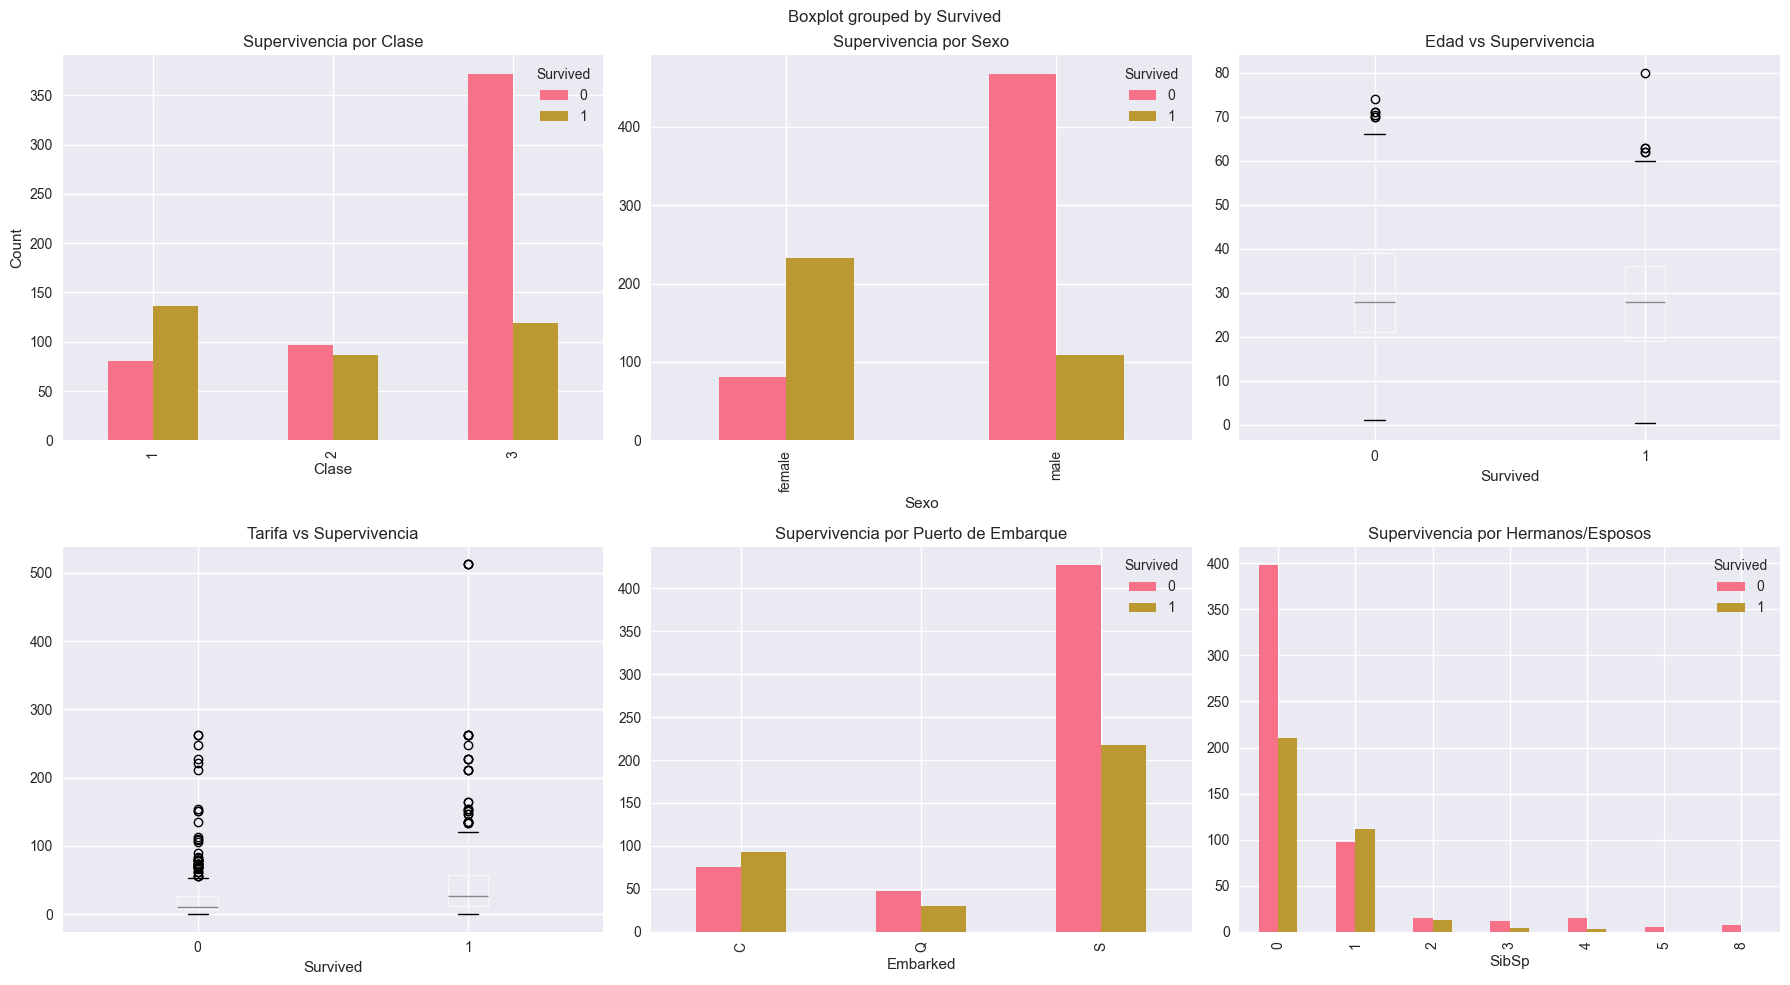

🔍 INSIGHTS INICIALES TITANIC:
• Las mujeres tuvieron mayor tasa de supervivencia
• La clase social influyó significativamente
• Los niños tuvieron prioridad en los botes salvavidas


In [6]:
# Análisis exploratorio Titanic

# Crear figura con subplots para visualizaciones
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Supervivencia por clase (Pclass)
survived_class = df_titanic.groupby(['Pclass', 'Survived']).size().unstack()  # Agrupar y contar
survived_class.plot(kind='bar', ax=axes[0, 0])  # Gráfico de barras
axes[0, 0].set_title('Supervivencia por Clase')
axes[0, 0].set_xlabel('Clase')
axes[0, 0].set_ylabel('Count')

# 2. Supervivencia por sexo
survived_sex = df_titanic.groupby(['Sex', 'Survived']).size().unstack()
survived_sex.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Supervivencia por Sexo')
axes[0, 1].set_xlabel('Sexo')

# 3. Edad vs Supervivencia
df_titanic.boxplot(column='Age', by='Survived', ax=axes[0, 2])  # Boxplot por supervivencia
axes[0, 2].set_title('Edad vs Supervivencia')

# 4. Tarifa vs Supervivencia
df_titanic.boxplot(column='Fare', by='Survived', ax=axes[1, 0])
axes[1, 0].set_title('Tarifa vs Supervivencia')

# 5. Supervivencia por puerto de embarque
if 'Embarked' in df_titanic.columns:
    survived_embarked = df_titanic.groupby(['Embarked', 'Survived']).size().unstack()
    survived_embarked.plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('Supervivencia por Puerto de Embarque')

# 6. Supervivencia por número de familiares (SibSp)
if 'SibSp' in df_titanic.columns:
    survived_sibsp = df_titanic.groupby(['SibSp', 'Survived']).size().unstack()
    survived_sibsp.plot(kind='bar', ax=axes[1, 2])
    axes[1, 2].set_title('Supervivencia por Hermanos/Esposos')

plt.tight_layout()
plt.show()

# Imprimir insights iniciales
print("🔍 INSIGHTS INICIALES TITANIC:")
print("• Las mujeres tuvieron mayor tasa de supervivencia")
print("• La clase social influyó significativamente")
print("• Los niños tuvieron prioridad en los botes salvavidas")

In [7]:
# Feature Engineering para Titanic

print("🔧 PREPROCESAMIENTO AVANZADO - TITANIC")

# Crear copia para no modificar original
df_titanic_clean = df_titanic.copy()

# 1. Manejar valores faltantes
df_titanic_clean['Age'].fillna(df_titanic_clean['Age'].median(), inplace=True)  # Rellenar edad con mediana
df_titanic_clean['Embarked'].fillna(df_titanic_clean['Embarked'].mode()[0], inplace=True)  # Rellenar embarked con moda
df_titanic_clean.drop(columns=['Cabin'], inplace=True, errors='ignore')  # Eliminar 'Cabin' (muchos faltantes)

# 2. Crear nuevas características
df_titanic_clean['Family_Size'] = df_titanic_clean['SibSp'] + df_titanic_clean['Parch'] + 1  # Tamaño familia
df_titanic_clean['Is_Alone'] = (df_titanic_clean['Family_Size'] == 1).astype(int)  # 1 si solo, 0 si no
df_titanic_clean['Title'] = df_titanic_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)  # Extraer título

# Simplificar títulos
title_mapping = {'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
                 'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
                 'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
                 'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs',
                 'Capt': 'Rare', 'Sir': 'Rare'}
df_titanic_clean['Title'] = df_titanic_clean['Title'].map(title_mapping)  # Mapear títulos

# 3. Codificar variables categóricas
label_encoders = {}
categorical_cols = ['Sex', 'Embarked', 'Title']

for col in categorical_cols:
    if col in df_titanic_clean.columns:
        le = LabelEncoder()  # Inicializar encoder
        df_titanic_clean[col] = le.fit_transform(df_titanic_clean[col].astype(str))  # Codificar
        label_encoders[col] = le  # Guardar encoder

# 4. Seleccionar características finales
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
            'Family_Size', 'Is_Alone', 'Title']
X_titanic = df_titanic_clean[features]  # X: features seleccionadas
y_titanic = df_titanic_clean['Survived']  # y: supervivencia

# 5. Dividir datos
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(
    X_titanic, y_titanic, test_size=0.3, random_state=42, stratify=y_titanic  # stratify por desbalance
)

# 6. Escalar para SVM
scaler_titanic = StandardScaler()  # Inicializar escalador
X_titanic_train_scaled = scaler_titanic.fit_transform(X_titanic_train)  # Ajustar y transformar train
X_titanic_test_scaled = scaler_titanic.transform(X_titanic_test)  # Solo transformar test

# Confirmar preparación
print("✅ DATOS TITANIC PREPARADOS:")
print(f"Características usadas: {features}")
print(f"Entrenamiento: {X_titanic_train.shape[0]} muestras")
print(f"Prueba: {X_titanic_test.shape[0]} muestras")
print(f"Proporción supervivencia: {y_titanic_train.value_counts(normalize=True).to_dict()}")

🔧 PREPROCESAMIENTO AVANZADO - TITANIC
✅ DATOS TITANIC PREPARADOS:
Características usadas: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family_Size', 'Is_Alone', 'Title']
Entrenamiento: 623 muestras
Prueba: 268 muestras
Proporción supervivencia: {0: 0.6163723916532905, 1: 0.38362760834670945}


Arbol de desición

In [8]:
# Árbol de Decisión para Titanic

print("🌳 ENTRENANDO ÁRBOL DE DECISIÓN (TITANIC)")

# Definir parámetros a probar
param_grid_tree_clf = {
    'max_depth': [3, 5, 7, 10],  # Profundidad máxima
    'min_samples_split': [2, 5, 10],  # Mínimo muestras para split
    'criterion': ['gini', 'entropy']  # Criterio de división: gini (default) o entropy
}
# Inicializar modelo con parámetros fijos
tree_titanic = DecisionTreeClassifier(random_state=42)
# Optimizar con GridSearchCV
grid_tree_clf = GridSearchCV(tree_titanic, param_grid_tree_clf, cv=5, scoring='accuracy', n_jobs=-1)
grid_tree_clf.fit(X_titanic_train, y_titanic_train)  # Entrenar

🌳 ENTRENANDO ÁRBOL DE DECISIÓN (TITANIC)


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


📊 RESULTADOS ÁRBOL - TITANIC:
 Exactitud: 0.787
 Precisión: 0.803
 Recall: 0.592
 F1-Score: 0.682


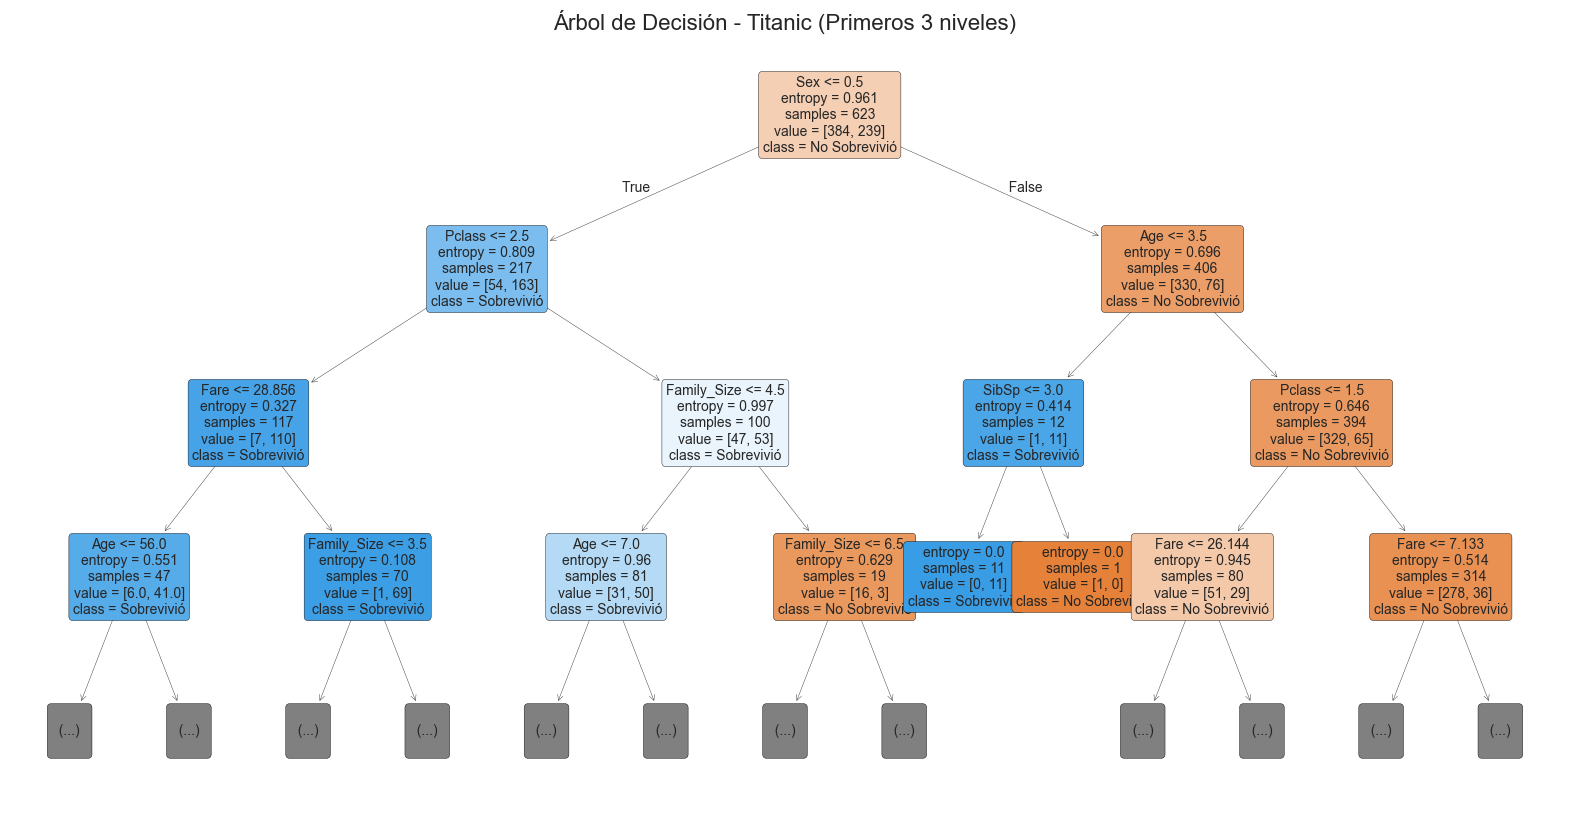

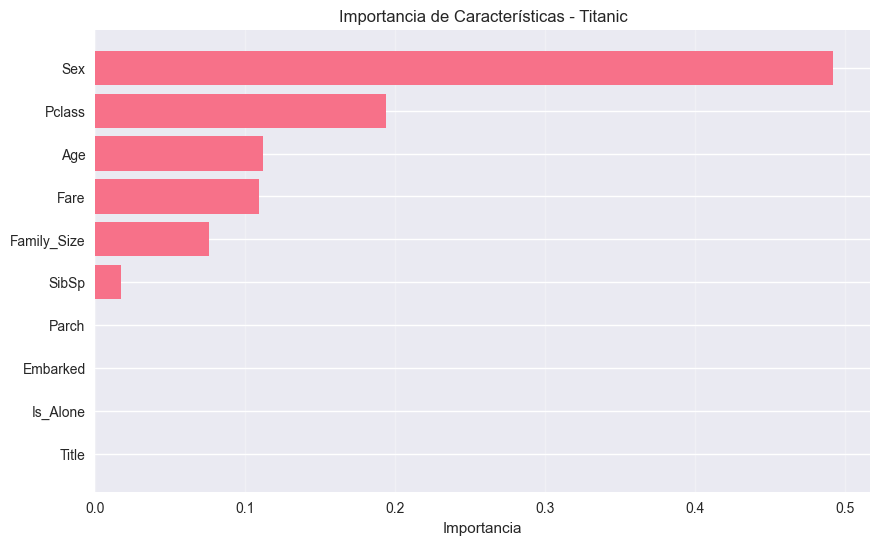

In [11]:
# Mejor modelo y predicciones
best_tree_clf = grid_tree_clf.best_estimator_
y_pred_tree_titanic = best_tree_clf.predict(X_titanic_test)  # Predecir en test

# Calcular métricas
accuracy_tree_titanic = accuracy_score(y_titanic_test, y_pred_tree_titanic)  # Exactitud
precision_tree_titanic = precision_score(y_titanic_test, y_pred_tree_titanic)  # Precisión
recall_tree_titanic = recall_score(y_titanic_test, y_pred_tree_titanic)  # Recall
f1_tree_titanic = f1_score(y_titanic_test, y_pred_tree_titanic)  # F1-Score

# Imprimir resultados
print(f"📊 RESULTADOS ÁRBOL - TITANIC:")
print(f" Exactitud: {accuracy_tree_titanic:.3f}")
print(f" Precisión: {precision_tree_titanic:.3f}")
print(f" Recall: {recall_tree_titanic:.3f}")
print(f" F1-Score: {f1_tree_titanic:.3f}")

# Visualizar árbol (versión simplificada)
plt.figure(figsize=(20, 10))
plot_tree(best_tree_clf,  # El modelo entrenado
          feature_names=features,  # Nombres de características
          class_names=['No Sobrevivió', 'Sobrevivió'],  # Nombres de clases
          filled=True,  # Colorear nodos por clase
          rounded=True,  # Bordes redondeados
          fontsize=10,  # Tamaño de fuente
          max_depth=3)  # Mostrar solo primeros 3 niveles para claridad
plt.title('Árbol de Decisión - Titanic (Primeros 3 niveles)', fontsize=16)
plt.show()

# Importancia de características
importancia_titanic = pd.DataFrame({
    'caracteristica': features,  # Nombres de features
    'importancia': best_tree_clf.feature_importances_  # Importancia calculada
}).sort_values('importancia', ascending=False)  # Ordenar de mayor a menor

plt.figure(figsize=(10, 6))
plt.barh(importancia_titanic['caracteristica'], importancia_titanic['importancia'])  # Gráfico horizontal
plt.xlabel('Importancia')  # Etiqueta X
plt.title('Importancia de Características - Titanic')
plt.gca().invert_yaxis()  # Invertir Y para que la más importante esté arriba
plt.grid(True, alpha=0.3, axis='x')  # Grid
plt.show()

SVM

In [ ]:
# SVM para Titanic

print("🎯 ENTRENANDO SVM (TITANIC)")

# Inicializar modelo con parámetros fijos
svm_titanic = SVC(
    C=1.0,  # Penalización por errores
    kernel='rbf',  # Kernel no lineal
    gamma='scale',  # Influencia de puntos
    random_state=42  # Para reproducibilidad
)
svm_titanic.fit(X_titanic_train_scaled, y_titanic_train)  # Entrenar con datos escalados

# Predicciones
y_pred_svm_titanic = svm_titanic.predict(X_titanic_test_scaled)  # Predecir en test escalado

# Calcular métricas
accuracy_svm_titanic = accuracy_score(y_titanic_test, y_pred_svm_titanic)  # Exactitud
precision_svm_titanic = precision_score(y_titanic_test, y_pred_svm_titanic)  # Precisión
recall_svm_titanic = recall_score(y_titanic_test, y_pred_svm_titanic)  # Recall
f1_svm_titanic = f1_score(y_titanic_test, y_pred_svm_titanic)  # F1-Score

# Imprimir resultados
print(f"📊 RESULTADOS SVM - TITANIC:")
print(f" Exactitud: {accuracy_svm_titanic:.3f}")
print(f" Precisión: {precision_svm_titanic:.3f}")
print(f" Recall: {recall_svm_titanic:.3f}")
print(f" F1-Score: {f1_svm_titanic:.3f}")

# Matrices de confusión comparativas
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Matriz para Árbol
cm_tree_titanic = confusion_matrix(y_titanic_test, y_pred_tree_titanic)  # Calcular para Árbol
sns.heatmap(cm_tree_titanic, annot=True, fmt='d', cmap='Blues', ax=axes[0],  # Colores azules
            xticklabels=['No Sobrevivió', 'Sobrevivió'],
            yticklabels=['No Sobrevivió', 'Sobrevivió'])
axes[0].set_title('Matriz Confusión - Árbol de Decisión')
axes[0].set_ylabel('Real')
axes[0].set_xlabel('Predicción')

# Matriz para SVM
cm_svm_titanic = confusion_matrix(y_titanic_test, y_pred_svm_titanic)  # Calcular para SVM
sns.heatmap(cm_svm_titanic, annot=True, fmt='d', cmap='Reds', ax=axes[1],  # Colores rojos
            xticklabels=['No Sobrevivió', 'Sobrevivió'],
            yticklabels=['No Sobrevivió', 'Sobrevivió'])
axes[1].set_title('Matriz Confusión - SVM')
axes[1].set_ylabel('Real')
axes[1].set_xlabel('Predicción')

plt.tight_layout()
plt.show()

Conclusiones

In [ ]:
# Comparación final todos los modelos

print("📊 COMPARACIÓN FINAL - TITANIC")

# Crear DataFrame con métricas para Titanic
resultados_titanic = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'SVM'],
    'Exactitud': [accuracy_tree_titanic, accuracy_svm_titanic],  # Exactitud
    'Precisión': [precision_tree_titanic, precision_svm_titanic],  # Precisión
    'Recall': [recall_tree_titanic, recall_svm_titanic],  # Recall
    'F1-Score': [f1_tree_titanic, f1_svm_titanic]  # F1-Score
})

print(resultados_titanic)  # Mostrar tabla

# Resumen de todos los ejercicios
print("\n" + "="*80)
print("🎯 RESUMEN FINAL DE TODOS LOS EJERCICIOS")
print("="*80)

# Crear DataFrame con métricas principales de cada modelo y dataset
resumen_final = pd.DataFrame({
    'Dataset': ['California Housing', 'California Housing', 'Diabetes', 'Diabetes', 'Titanic', 'Titanic'],
    'Modelo': ['Árbol', 'SVM', 'Árbol', 'SVM', 'Árbol', 'SVM'],
    'Métrica Principal': ['r2_tree', 'r2_svm', 'accuracy_tree', 'accuracy_svm', 'accuracy_tree_titanic', 'accuracy_svm_titanic'],  # R² para regresión, Exactitud para clasificación
    'Valor': [r2_tree, r2_svm, accuracy_tree, accuracy_svm, accuracy_tree_titanic, accuracy_svm_titanic]  # Valores numéricos
})

print(resumen_final)  # Mostrar resumen

# Visualización resumen final
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas

# California Housing (R²)
axes[0].bar(['Árbol', 'SVM'], [r2_tree, r2_svm], color=['skyblue', 'lightcoral'])
axes[0].set_title('California Housing\n(R² Score)')
axes[0].set_ylabel('R²')
axes[0].grid(True, alpha=0.3)
for i, v in enumerate([r2_tree, r2_svm]):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')  # Texto en barras

# Diabetes (Exactitud)
axes[1].bar(['Árbol', 'SVM'], [accuracy_tree, accuracy_svm], color=['skyblue', 'lightcoral'])
axes[1].set_title('Diabetes\n(Exactitud)')
axes[1].set_ylabel('Exactitud')
axes[1].grid(True, alpha=0.3)
for i, v in enumerate([accuracy_tree, accuracy_svm]):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Titanic (Exactitud)
axes[2].bar(['Árbol', 'SVM'], [accuracy_tree_titanic, accuracy_svm_titanic], color=['skyblue', 'lightcoral'])
axes[2].set_title('Titanic\n(Exactitud)')
axes[2].set_ylabel('Exactitud')
axes[2].grid(True, alpha=0.3)
for i, v in enumerate([accuracy_tree_titanic, accuracy_svm_titanic]):
    axes[2].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
